<a href="https://colab.research.google.com/github/shahbaz1982/SEIR/blob/main/SEIR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

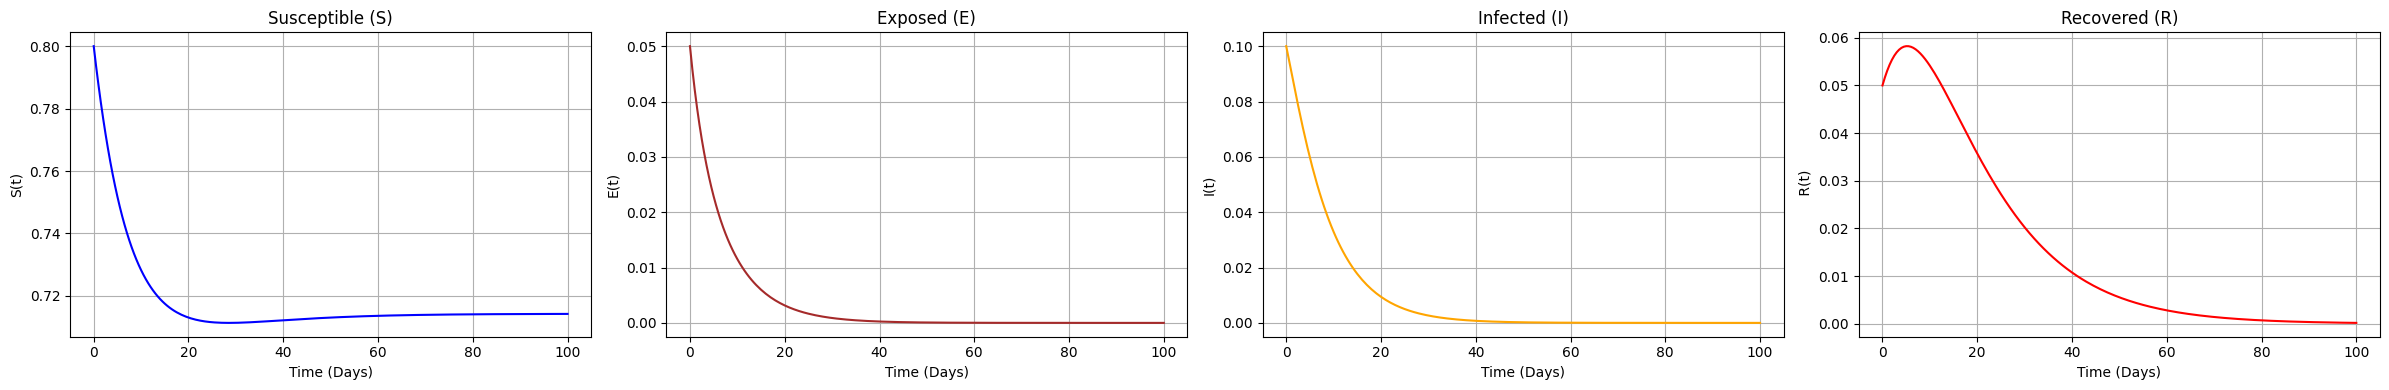

S: [0.8        0.79360425 0.78760609 0.7819883  0.7767329  0.77182164
 0.76723625 0.76295874 0.75897155 0.75525767 0.75180071 0.74858499
 0.74559555 0.74281817 0.74023935 0.73784634 0.73562708 0.73357022
 0.73166506 0.72990154 0.72827022 0.72676223 0.72536925 0.72408348
 0.72289761 0.7218048  0.72079865 0.71987317 0.71902274 0.71824214
 0.71752645 0.71687111 0.71627183 0.71572462 0.71522575 0.71477174
 0.71435932 0.71398548 0.71364738 0.71334237 0.71306799 0.71282195
 0.71260211 0.71240647 0.71223317 0.71208049 0.7119468  0.71183061
 0.71173053 0.71164524 0.71157355 0.71151432 0.71146651 0.71142916
 0.71140136 0.71138227 0.71137111 0.71136716 0.71136976 0.71137829
 0.71139217 0.71141086 0.71143389 0.71146078 0.71149113 0.71152455
 0.71156067 0.71159916 0.71163973 0.71168209 0.71172599 0.71177118
 0.71181745 0.7118646  0.71191245 0.71196083 0.71200959 0.71205859
 0.71210771 0.71215683 0.71220584 0.71225465 0.71230319 0.71235136
 0.71239911 0.71244637 0.71249308 0.71253921 0.71258471 0.7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
S0 = 0.8
E0 =  0.05
I0 = 0.1
R0 = 0.05
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

# Time parameters
t0 = 0
tf = 100  # Final time
dt = 0.5  # Time step
N = int((tf - t0) / dt)  # Number of steps

# Initialize solution arrays
t = np.linspace(t0, tf, N + 1)
S_1 = np.zeros(N + 1)
E_1 = np.zeros(N + 1)
I_1 = np.zeros(N + 1)
R_1 = np.zeros(N + 1)

# Initial values
S_1[0] = S0
E_1[0] = E0
I_1[0] = I0
R_1[0] = R0

# Define the system of equations
def f(S, E, I, R):
   dS = A -  mu * S - beta * S * I
   dE = beta * S * I - ( sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R
   return np.array([dS, dE, dI, dR])

# RK4 Method
for i in range(N):
    Si, Ei, Ii, Ri = S_1[i], E_1[i], I_1[i], R_1[i]

    k1 = dt * f(Si, Ei, Ii, Ri)
    k2 = dt * f(Si + k1[0] / 2, Ei + k1[1] / 2, Ii + k1[2] / 2, Ri + k1[3] / 2)
    k3 = dt * f(Si + k2[0] / 2, Ei + k2[1] / 2, Ii + k2[2] / 2, Ri + k2[3] / 2)
    k4 = dt * f(Si + k3[0], Ei + k3[1], Ii + k3[2], Ri + k3[3])

    S_1[i + 1] = Si + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
    E_1[i + 1] = Ei + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    I_1[i + 1] = Ii + (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
    R_1[i + 1] = Ri + (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6

# Plot the results
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.plot(t, S_1, label="S(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t, E_1, label="E(t)", color='brown')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed (E)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t, I_1, label="I(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t, R_1, label="R(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel(" R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("S:", S_1)
print("E:", E_1)
print("I:", I_1)
print("R:", R_1)

Iteration 0, Total Loss: 0.013689928688108921
Iteration 500, Total Loss: 9.443487414273477e-08
Iteration 1000, Total Loss: 2.7368614041733963e-08
Iteration 1500, Total Loss: 1.041222752462545e-08
Iteration 2000, Total Loss: 7.885614827785048e-09
Iteration 2500, Total Loss: 2.865740000856931e-08
Iteration 3000, Total Loss: 3.83222520383697e-09
Iteration 3500, Total Loss: 9.074883422499624e-08
Iteration 4000, Total Loss: 1.075032063369008e-08
Iteration 4500, Total Loss: 2.03885108795987e-09


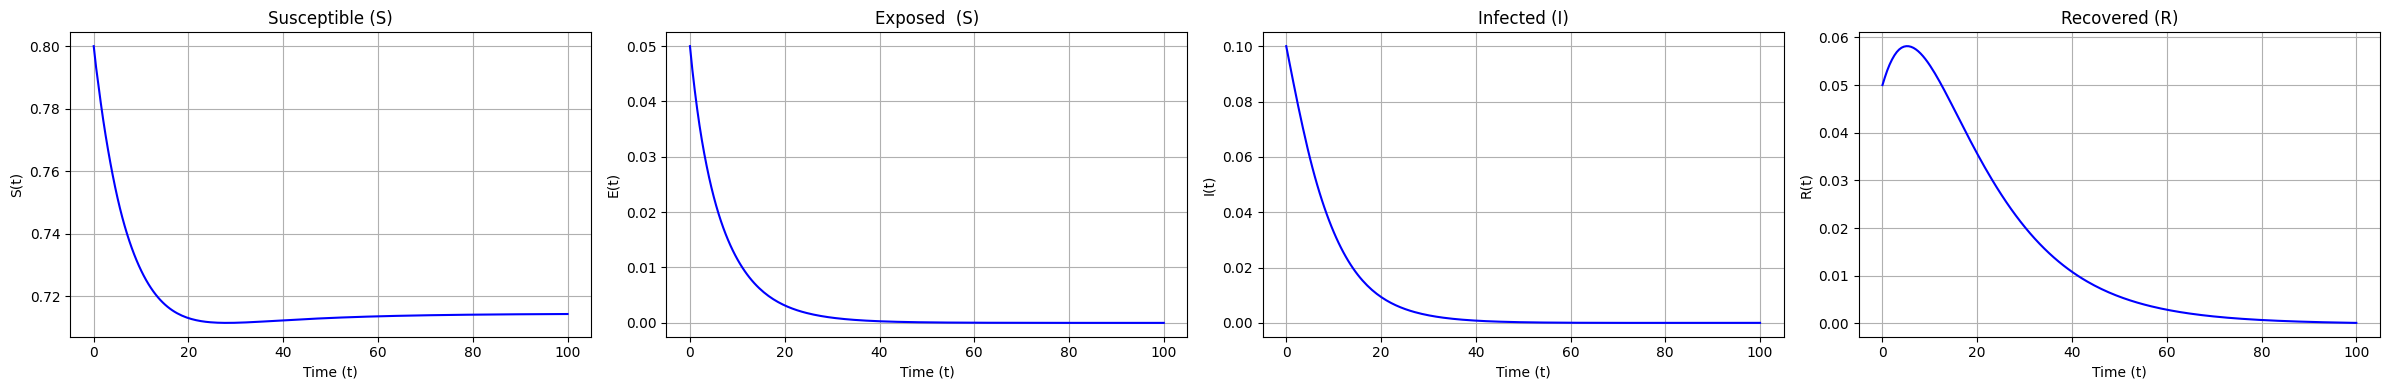

tensor([[ 8.0000e-01,  4.9999e-02,  1.0000e-01,  5.0000e-02],
        [ 7.9319e-01,  4.5738e-02,  9.5570e-02,  5.1602e-02],
        [ 7.8731e-01,  4.2057e-02,  9.1276e-02,  5.3061e-02],
        [ 7.8166e-01,  3.8713e-02,  8.6910e-02,  5.4306e-02],
        [ 7.7633e-01,  3.5696e-02,  8.2603e-02,  5.5348e-02],
        [ 7.7144e-01,  3.3005e-02,  7.8452e-02,  5.6224e-02],
        [ 7.6690e-01,  3.0579e-02,  7.4421e-02,  5.6932e-02],
        [ 7.6264e-01,  2.8364e-02,  7.0483e-02,  5.7466e-02],
        [ 7.5863e-01,  2.6332e-02,  6.6655e-02,  5.7837e-02],
        [ 7.5488e-01,  2.4465e-02,  6.2968e-02,  5.8065e-02],
        [ 7.5140e-01,  2.2752e-02,  5.9443e-02,  5.8165e-02],
        [ 7.4819e-01,  2.1178e-02,  5.6092e-02,  5.8151e-02],
        [ 7.4521e-01,  1.9730e-02,  5.2911e-02,  5.8031e-02],
        [ 7.4247e-01,  1.8395e-02,  4.9895e-02,  5.7813e-02],
        [ 7.3992e-01,  1.7161e-02,  4.7036e-02,  5.7503e-02],
        [ 7.3757e-01,  1.6020e-02,  4.4323e-02,  5.7108e-02],
        

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Define the fully connected neural network (FCN)
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, t):
        t = self.fcs(t)
        t = self.fch(t)
        t = self.fce(t)
        return t

torch.manual_seed(123)

# Instantiate the PINN model
pinn = FCN(1, 4, 64, 4)

# Define t_boundary for initial conditions
t_boundary_1 = torch.tensor([[0.0]], requires_grad=True)

# Define interior points for the physics-informed loss
t_physics_1 = torch.linspace(0, 100, 200).view(-1, 1).requires_grad_(True)

# Test points for evaluating the solution
t_test_1 = torch.linspace(0, 100, 200).view(-1, 1)

# Training loop
optimiser = torch.optim.Adam(pinn.parameters(), lr=1e-2)
lambda1, lambda2 = 0.01, 1.0

# For plotting S_physics, E_physics, I_physics, and R_physics
S_physics_plots_1 = []
E_physics_plots_1 = []
I_physics_plots_1 = []
R_physics_plots_1 = []
# Initial conditions
S0 = 0.8
E0 =  0.05
I0 = 0.1
R0 = 0.05
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

for i in range(5000):
    optimiser.zero_grad()

    # Enforce initial conditions:
    u_t_boundary = pinn(t_boundary_1)
    S_boundary = u_t_boundary[:, 0:1]  # First output is S(t)
    E_boundary = u_t_boundary[:, 1:2]  # Second output is E(t)
    I_boundary = u_t_boundary[:, 2:3]  # Third output is I(t)
    R_boundary = u_t_boundary[:, 3:4]  # Fourth output is R(t)
    loss_ic = torch.mean((S_boundary - S0)**2 + (E_boundary - E0)**2 +  (I_boundary - I0)**2 + (R_boundary - R0)**2)

    # Physics-informed loss for the interior points
    u_t_physics = pinn(t_physics_1)
    S_physics_1 = u_t_physics[:, 0:1]  # First output is S(t)
    E_physics_1 = u_t_physics[:, 1:2]  # Second output is E(t)
    I_physics_1 = u_t_physics[:, 2:3]  # Third output is I(t)
    R_physics_1 = u_t_physics[:, 3:4]  # Fourth output is R(t)

    # Compute dS/dt, dI/dt, dR/dt using autograd
    dS_dt = torch.autograd.grad(
        outputs=S_physics_1,
        inputs=t_physics_1,
        grad_outputs=torch.ones_like(S_physics_1),
        create_graph=True
    )[0]

    dE_dt = torch.autograd.grad(
        outputs=E_physics_1,
        inputs=t_physics_1,
        grad_outputs=torch.ones_like(E_physics_1),
        create_graph=True
    )[0]

    dI_dt = torch.autograd.grad(
        outputs=I_physics_1,
        inputs=t_physics_1,
        grad_outputs=torch.ones_like(I_physics_1),
        create_graph=True
    )[0]

    dR_dt = torch.autograd.grad(
        outputs=R_physics_1,
        inputs=t_physics_1,
        grad_outputs=torch.ones_like(R_physics_1),
        create_graph=True
    )[0]

    # Physics-informed losses using the ODEs
    loss_ode_S = torch.mean((dS_dt - A +  mu * S_physics_1 + beta * S_physics_1 * I_physics_1 )**2)
    loss_ode_E = torch.mean((dE_dt - beta * S_physics_1 * I_physics_1 + ( sigma + mu) * E_physics_1)**2)
    loss_ode_I = torch.mean((dI_dt - sigma * E_physics_1 + (alpha + mu + gamma) * I_physics_1)**2)
    loss_ode_R = torch.mean((dR_dt - gamma * I_physics_1 + mu * R_physics_1)**2)

    # Total physics-informed loss
    loss_ode = loss_ode_S + loss_ode_I + loss_ode_R + loss_ode_E

    # Total loss
    loss = lambda1 * loss_ic + lambda2 * loss_ode
    loss.backward()
    optimiser.step()

    # Print the loss every 500 epochs
    if i % 500 == 0:
        print(f"Iteration {i}, Total Loss: {loss.item()}")

    # Save S_physics, E_physics, I_physics, and R_physics for plotting every 500 epochs
    if i % 500 == 0:
        S_physics_plots_1.append(S_physics_1.detach().numpy())
        E_physics_plots_1.append(E_physics_1.detach().numpy())
        I_physics_plots_1.append(I_physics_1.detach().numpy())
        R_physics_plots_1.append(R_physics_1.detach().numpy())

# Plot the results
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
plt.plot(t_physics_1.detach().numpy(), S_physics_1.detach().numpy(), label="S(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t_physics_1.detach().numpy(), E_physics_1.detach().numpy(), label="E(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed  (S)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t_physics_1.detach().numpy(), I_physics_1.detach().numpy(), label="I(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t_physics_1.detach().numpy(), R_physics_1.detach().numpy(), label="R(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()
print(u_t_physics)

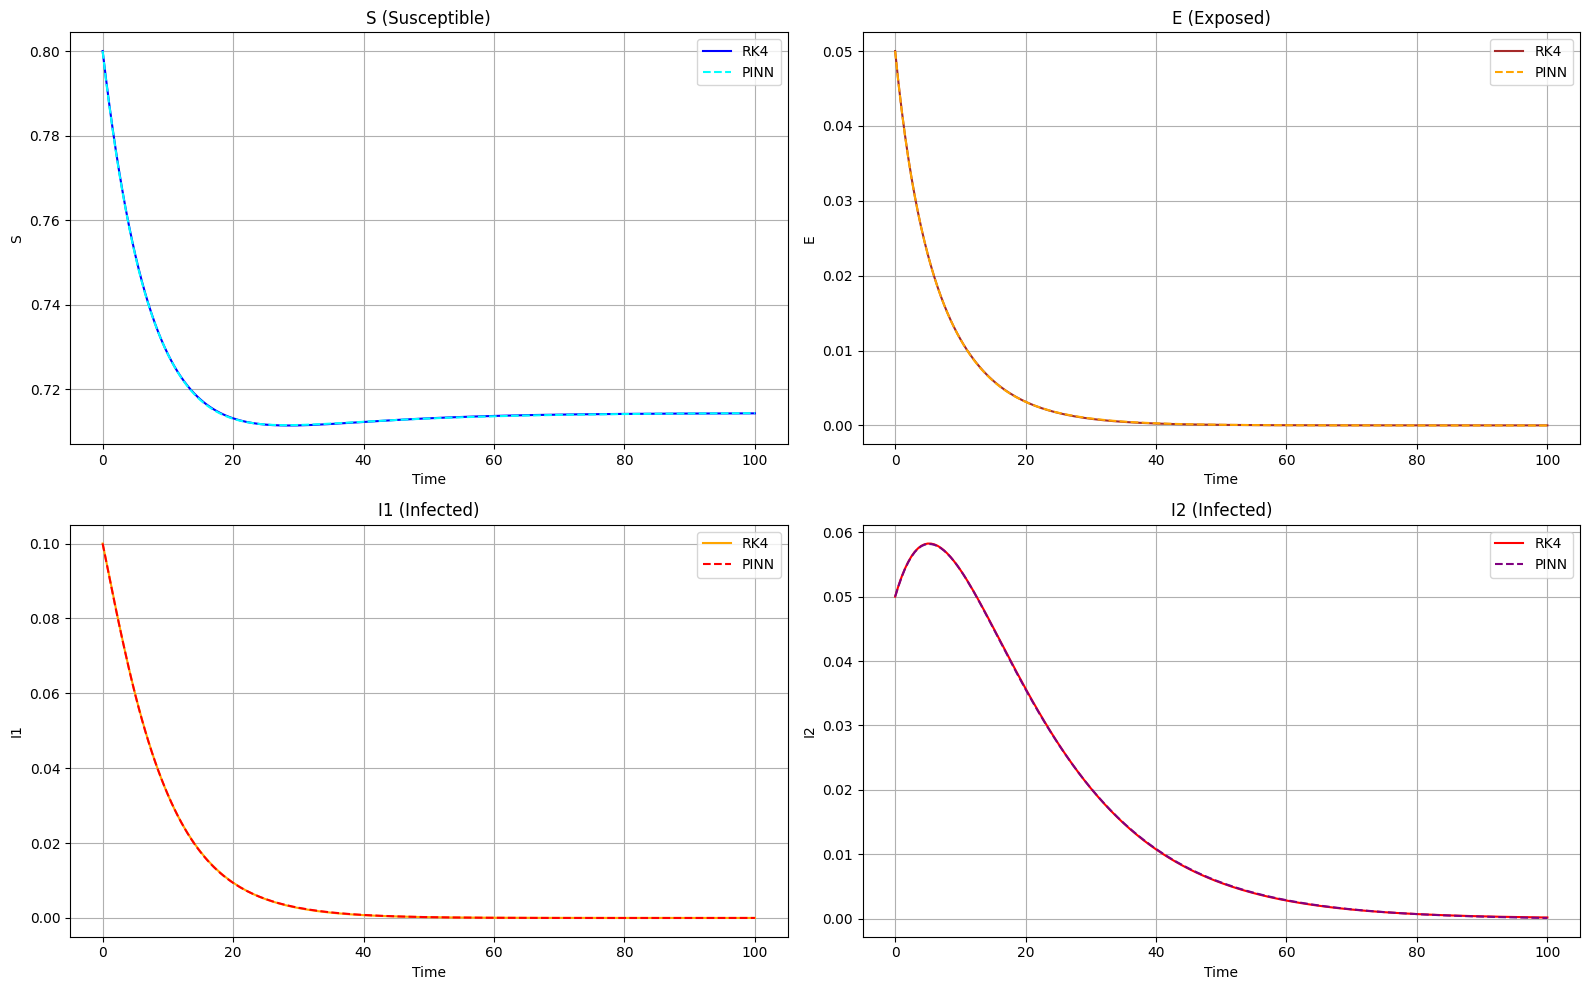

In [ ]:
# Comparison Plots
plt.figure(figsize=(16, 10))

# S(t)
plt.subplot(2, 2, 1)
plt.plot(t, S_1, label='RK4', color='blue')
plt.plot(t_physics_1.detach().numpy(), S_physics_1.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')
plt.title('S (Susceptible)')
plt.xlabel('Time(Days)')
plt.ylabel('S(t)')
plt.legend()
plt.grid()

# E(t)
plt.subplot(2, 2, 2)
plt.plot(t, E_1, label='RK4', color='brown')
plt.plot(t_physics_1.detach().numpy(), E_physics_1.detach().numpy(), label='PINN', color='orange', linestyle='dashed')
plt.title('E (Exposed)')
plt.xlabel('Time(Days)')
plt.ylabel('E(t)')
plt.legend()
plt.grid()

# I(t)
plt.subplot(2, 2, 3)
plt.plot(t, I_1, label='RK4', color='orange')
plt.plot(t_physics_1.detach().numpy(), I_physics_1.detach().numpy(), label='PINN', color='red', linestyle='dashed')
plt.title('I (Infected)')
plt.xlabel('Time(Days)')
plt.ylabel('I(t)')
plt.legend()
plt.grid()

# R(t)
plt.subplot(2, 2, 4)
plt.plot(t, R_1, label='RK4', color='red')
plt.plot(t_physics_1.detach().numpy(), R_physics_1.detach().numpy(), label='PINN', color='purple', linestyle='dashed')
plt.title('R (Recovered)')
plt.xlabel('Time(Days)')
plt.ylabel('R(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

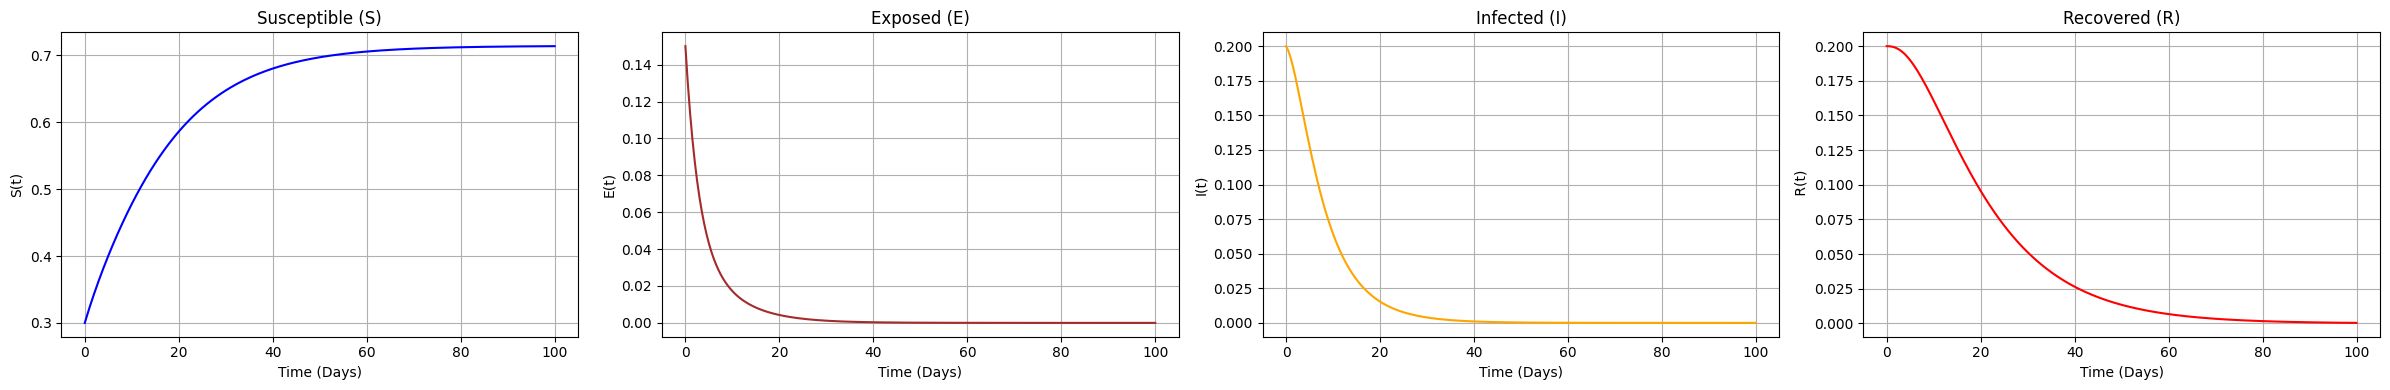

S: [0.3        0.31156467 0.32269262 0.33342917 0.343813   0.35387682
 0.36364822 0.37315028 0.38240229 0.39142027 0.40021754 0.4088051
 0.41719209 0.42538607 0.43339335 0.44121918 0.44886802 0.45634364
 0.46364932 0.47078796 0.47776212 0.4845742  0.4912264  0.49772086
 0.50405961 0.5102447  0.51627816 0.52216202 0.52789835 0.53348925
 0.53893687 0.5442434  0.54941106 0.55444214 0.55933896 0.56410387
 0.56873926 0.57324757 0.57763123 0.58189271 0.58603451 0.59005912
 0.59396904 0.59776678 0.60145484 0.60503571 0.60851189 0.61188585
 0.61516003 0.61833687 0.62141879 0.62440816 0.62730734 0.63011866
 0.6328444  0.63548684 0.63804817 0.6405306  0.64293627 0.64526729
 0.64752572 0.6497136  0.65183291 0.65388559 0.65587356 0.65779867
 0.65966274 0.66146756 0.66321486 0.66490634 0.66654365 0.66812842
 0.66966221 0.67114656 0.67258297 0.67397289 0.67531774 0.67661891
 0.67787773 0.67909552 0.68027354 0.68141304 0.68251522 0.68358124
 0.68461224 0.68560932 0.68657356 0.68750599 0.68840763 0.68

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
S0 = 0.3
E0 =  0.15
I0 = 0.2
R0 = 0.2
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

# Time parameters
t0 = 0
tf = 100  # Final time
dt = 0.5  # Time step
N = int((tf - t0) / dt)  # Number of steps

# Initialize solution arrays
t = np.linspace(t0, tf, N + 1)
S_2 = np.zeros(N + 1)
E_2 = np.zeros(N + 1)
I_2 = np.zeros(N + 1)
R_2 = np.zeros(N + 1)

# Initial values
S_2[0] = S0
E_2[0] = E0
I_2[0] = I0
R_2[0] = R0

# Define the system of equations
def f(S, E, I, R):
   dS = A -  mu * S - beta * S * I
   dE = beta * S * I - ( sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R
   return np.array([dS, dE, dI, dR])

# RK4 Method
for i in range(N):
    Si, Ei, Ii, Ri = S_2[i], E_2[i], I_2[i], R_2[i]

    k1 = dt * f(Si, Ei, Ii, Ri)
    k2 = dt * f(Si + k1[0] / 2, Ei + k1[1] / 2, Ii + k1[2] / 2, Ri + k1[3] / 2)
    k3 = dt * f(Si + k2[0] / 2, Ei + k2[1] / 2, Ii + k2[2] / 2, Ri + k2[3] / 2)
    k4 = dt * f(Si + k3[0], Ei + k3[1], Ii + k3[2], Ri + k3[3])

    S_2[i + 1] = Si + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
    E_2[i + 1] = Ei + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    I_2[i + 1] = Ii + (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
    R_2[i + 1] = Ri + (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6

# Plot the results
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.plot(t, S_2, label="S(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t, E_2, label="E(t)", color='brown')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed (E)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t, I_2, label="I(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t, R_2, label="R(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel(" R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("S:", S_2)
print("E:", E_2)
print("I:", I_2)
print("R:", R_2)

Iteration 0, Total Loss: 0.009297133423388004
Iteration 500, Total Loss: 1.6671756952746364e-07
Iteration 1000, Total Loss: 1.8403166990310638e-08
Iteration 1500, Total Loss: 7.09234271312198e-09
Iteration 2000, Total Loss: 6.178355604902208e-09
Iteration 2500, Total Loss: 4.5596930675628755e-09
Iteration 3000, Total Loss: 3.2022200446846227e-09
Iteration 3500, Total Loss: 2.6962216903569924e-09
Iteration 4000, Total Loss: 2.527119704609504e-07
Iteration 4500, Total Loss: 9.193211525371225e-09


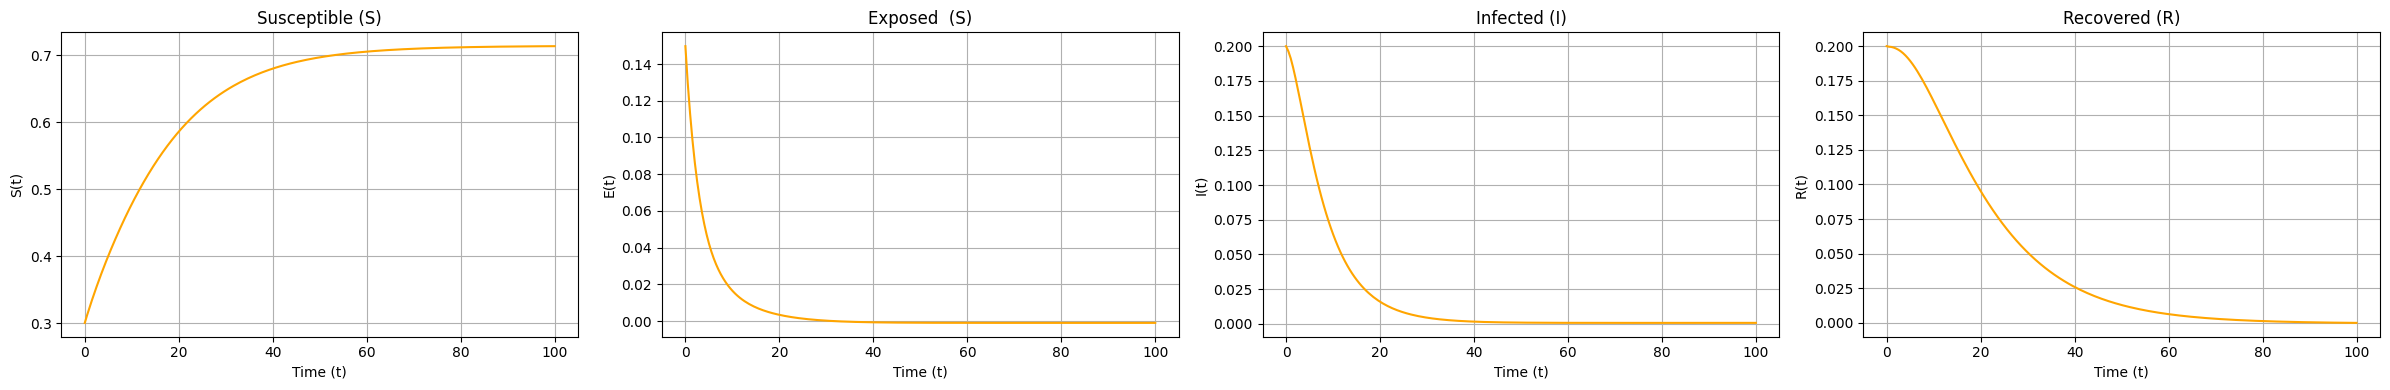

tensor([[ 3.0024e-01,  1.4976e-01,  2.0002e-01,  1.9989e-01],
        [ 3.1194e-01,  1.2950e-01,  1.9633e-01,  1.9949e-01],
        [ 3.2298e-01,  1.1281e-01,  1.9122e-01,  1.9932e-01],
        [ 3.3373e-01,  9.8489e-02,  1.8464e-01,  1.9886e-01],
        [ 3.4416e-01,  8.6245e-02,  1.7717e-01,  1.9818e-01],
        [ 3.5421e-01,  7.5855e-02,  1.6919e-01,  1.9729e-01],
        [ 3.6399e-01,  6.6981e-02,  1.6087e-01,  1.9615e-01],
        [ 3.7352e-01,  5.9344e-02,  1.5237e-01,  1.9476e-01],
        [ 3.8281e-01,  5.2747e-02,  1.4385e-01,  1.9312e-01],
        [ 3.9185e-01,  4.7045e-02,  1.3545e-01,  1.9125e-01],
        [ 4.0064e-01,  4.2115e-02,  1.2727e-01,  1.8916e-01],
        [ 4.0921e-01,  3.7846e-02,  1.1938e-01,  1.8688e-01],
        [ 4.1758e-01,  3.4133e-02,  1.1183e-01,  1.8440e-01],
        [ 4.2578e-01,  3.0886e-02,  1.0463e-01,  1.8176e-01],
        [ 4.3379e-01,  2.8029e-02,  9.7789e-02,  1.7895e-01],
        [ 4.4164e-01,  2.5501e-02,  9.1315e-02,  1.7601e-01],
        

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Define the fully connected neural network (FCN)
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, t):
        t = self.fcs(t)
        t = self.fch(t)
        t = self.fce(t)
        return t

torch.manual_seed(123)

# Instantiate the PINN model
pinn = FCN(1, 4, 64, 4)

# Define t_boundary for initial conditions
t_boundary_2 = torch.tensor([[0.0]], requires_grad=True)

# Define interior points for the physics-informed loss
t_physics_2 = torch.linspace(0, 100, 200).view(-1, 1).requires_grad_(True)

# Test points for evaluating the solution
t_test_2 = torch.linspace(0, 100, 200).view(-1, 1)

# Training loop
optimiser = torch.optim.Adam(pinn.parameters(), lr=1e-2)
lambda1, lambda2 = 0.01, 1.0

# For plotting S_physics, E_physics, I_physics, and R_physics at every 500 epochs
S_physics_plots_2 = []
E_physics_plots_2 = []
I_physics_plots_2 = []
R_physics_plots_2 = []
# Initial conditions
S0 = 0.3
E0 =  0.15
I0 = 0.2
R0 = 0.2
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

for i in range(4800):
    optimiser.zero_grad()

    # Enforce initial conditions:
    u_t_boundary = pinn(t_boundary_2)
    S_boundary = u_t_boundary[:, 0:1]  # First output is S(t)
    E_boundary = u_t_boundary[:, 1:2]  # Second output is E(t)
    I_boundary = u_t_boundary[:, 2:3]  # Third output is I(t)
    R_boundary = u_t_boundary[:, 3:4]  # Fourth output is R(t)
    loss_ic = torch.mean((S_boundary - S0)**2 + (E_boundary - E0)**2 +  (I_boundary - I0)**2 + (R_boundary - R0)**2)

    # Physics-informed loss for the interior points
    u_t_physics = pinn(t_physics_2)
    S_physics_2 = u_t_physics[:, 0:1]  # First output is S(t)
    E_physics_2 = u_t_physics[:, 1:2]  # Second output is E(t)
    I_physics_2 = u_t_physics[:, 2:3]  # Third output is I(t)
    R_physics_2 = u_t_physics[:, 3:4]  # Fourth output is R(t)

    # Compute dS/dt, dI/dt, dR/dt using autograd
    dS_dt = torch.autograd.grad(
        outputs=S_physics_2,
        inputs=t_physics_2,
        grad_outputs=torch.ones_like(S_physics_2),
        create_graph=True
    )[0]

    dE_dt = torch.autograd.grad(
        outputs=E_physics_2,
        inputs=t_physics_2,
        grad_outputs=torch.ones_like(E_physics_2),
        create_graph=True
    )[0]

    dI_dt = torch.autograd.grad(
        outputs=I_physics_2,
        inputs=t_physics_2,
        grad_outputs=torch.ones_like(I_physics_2),
        create_graph=True
    )[0]

    dR_dt = torch.autograd.grad(
        outputs=R_physics_2,
        inputs=t_physics_2,
        grad_outputs=torch.ones_like(R_physics_2),
        create_graph=True
    )[0]

    # Physics-informed losses using the ODEs
    loss_ode_S = torch.mean((dS_dt - A +  mu * S_physics_2 + beta * S_physics_2 * I_physics_2 )**2)
    loss_ode_E = torch.mean((dE_dt - beta * S_physics_2 * I_physics_2 + ( sigma + mu) * E_physics_2)**2)
    loss_ode_I = torch.mean((dI_dt - sigma * E_physics_2 + (alpha + mu + gamma) * I_physics_2)**2)
    loss_ode_R = torch.mean((dR_dt - gamma * I_physics_2 + mu * R_physics_2)**2)

    # Total physics-informed loss
    loss_ode = loss_ode_S + loss_ode_I + loss_ode_R + loss_ode_E

    # Total loss
    loss = lambda1 * loss_ic + lambda2 * loss_ode
    loss.backward()
    optimiser.step()

    # Print the loss every 500 epochs
    if i % 500 == 0:
        print(f"Iteration {i}, Total Loss: {loss.item()}")

    # Save S_physics, E_physics, I_physics, and R_physics for plotting every 500 epochs
    if i % 500 == 0:
        S_physics_plots_2.append(S_physics_2.detach().numpy())
        E_physics_plots_2.append(E_physics_2.detach().numpy())
        I_physics_plots_2.append(I_physics_2.detach().numpy())
        R_physics_plots_2.append(R_physics_2.detach().numpy())

# Plot the results
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
plt.plot(t_physics_2.detach().numpy(), S_physics_2.detach().numpy(), label="S(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t_physics_2.detach().numpy(), E_physics_2.detach().numpy(), label="E(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed  (E)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t_physics_2.detach().numpy(), I_physics_2.detach().numpy(), label="I(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t_physics_2.detach().numpy(), R_physics_2.detach().numpy(), label="R(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()
print(u_t_physics)

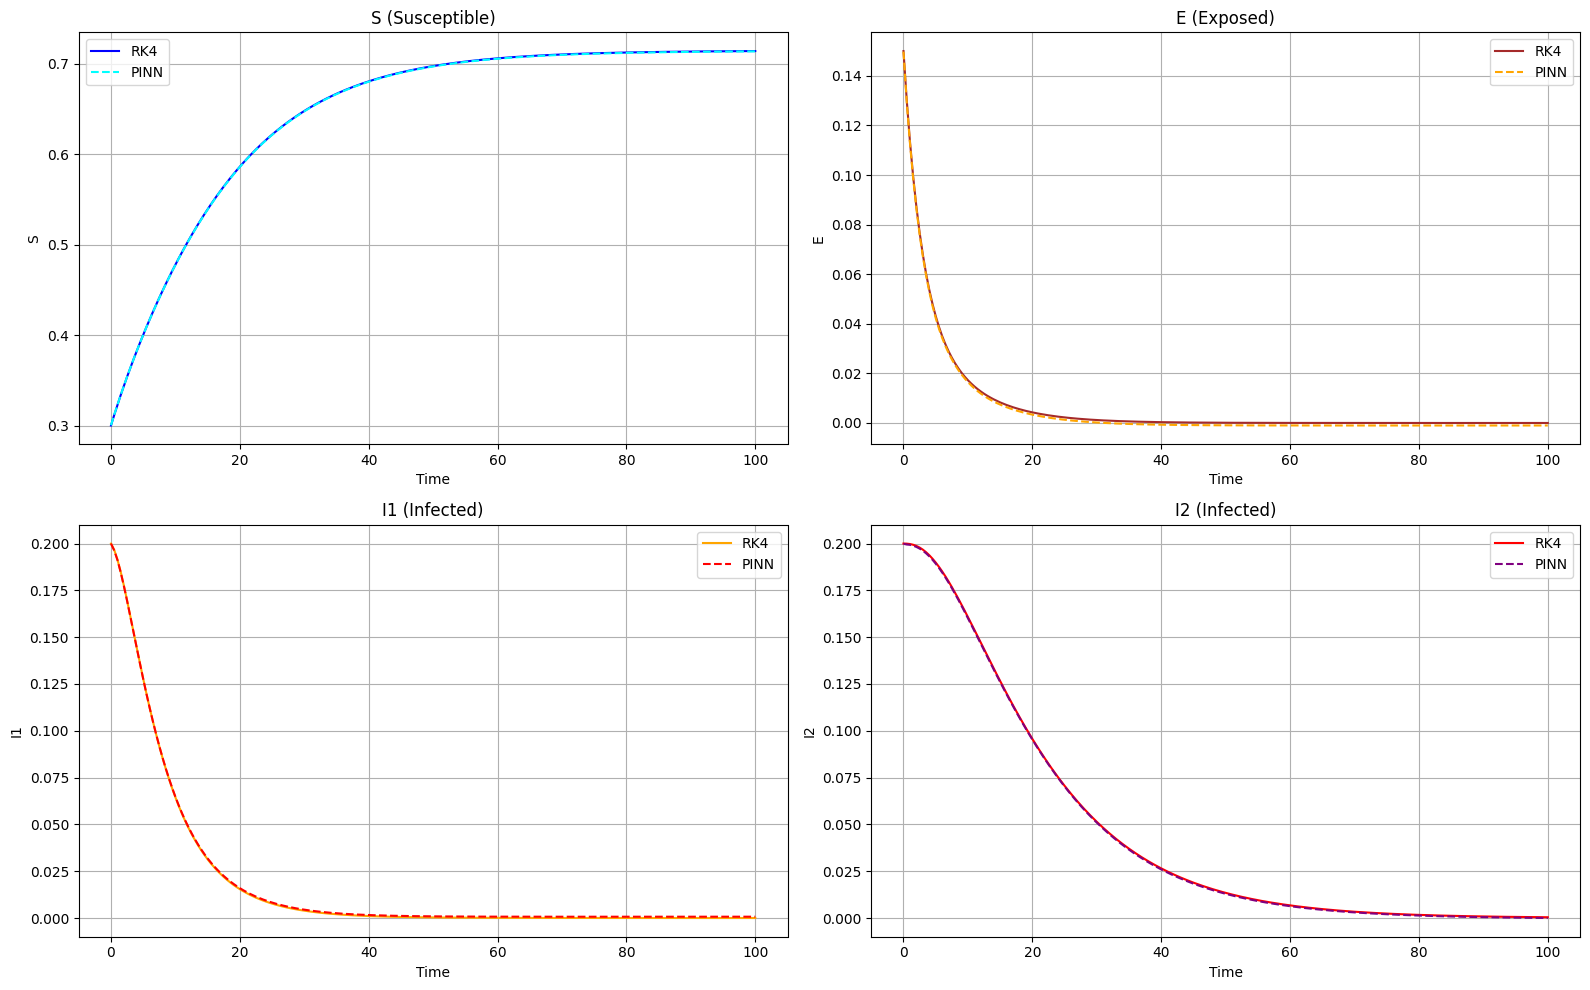

In [ ]:
# Comparison Plots
plt.figure(figsize=(16, 10))

# S(t)
plt.subplot(2, 2, 1)
plt.plot(t, S_2, label='RK4', color='blue')
plt.plot(t_physics_2.detach().numpy(), S_physics_2.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')
plt.title('S (Susceptible)')
plt.xlabel('Time(Days)')
plt.ylabel('S(t)')
plt.legend()
plt.grid()

# E(t)
plt.subplot(2, 2, 2)
plt.plot(t, E_2, label='RK4', color='brown')
plt.plot(t_physics_2.detach().numpy(), E_physics_2.detach().numpy(), label='PINN', color='orange', linestyle='dashed')
plt.title('E (Exposed)')
plt.xlabel('Time(Days)')
plt.ylabel('E(t)')
plt.legend()
plt.grid()

# I1(t)
plt.subplot(2, 2, 3)
plt.plot(t, I_2, label='RK4', color='orange')
plt.plot(t_physics_2.detach().numpy(), I_physics_2.detach().numpy(), label='PINN', color='red', linestyle='dashed')
plt.title('I (Infected)')
plt.xlabel('Time(Days)')
plt.ylabel('I(t)')
plt.legend()
plt.grid()

# I2(t)
plt.subplot(2, 2, 4)
plt.plot(t, R_2, label='RK4', color='red')
plt.plot(t_physics_2.detach().numpy(), R_physics_2.detach().numpy(), label='PINN', color='purple', linestyle='dashed')
plt.title('R (Recovered)')
plt.xlabel('Time(Days)')
plt.ylabel('R(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

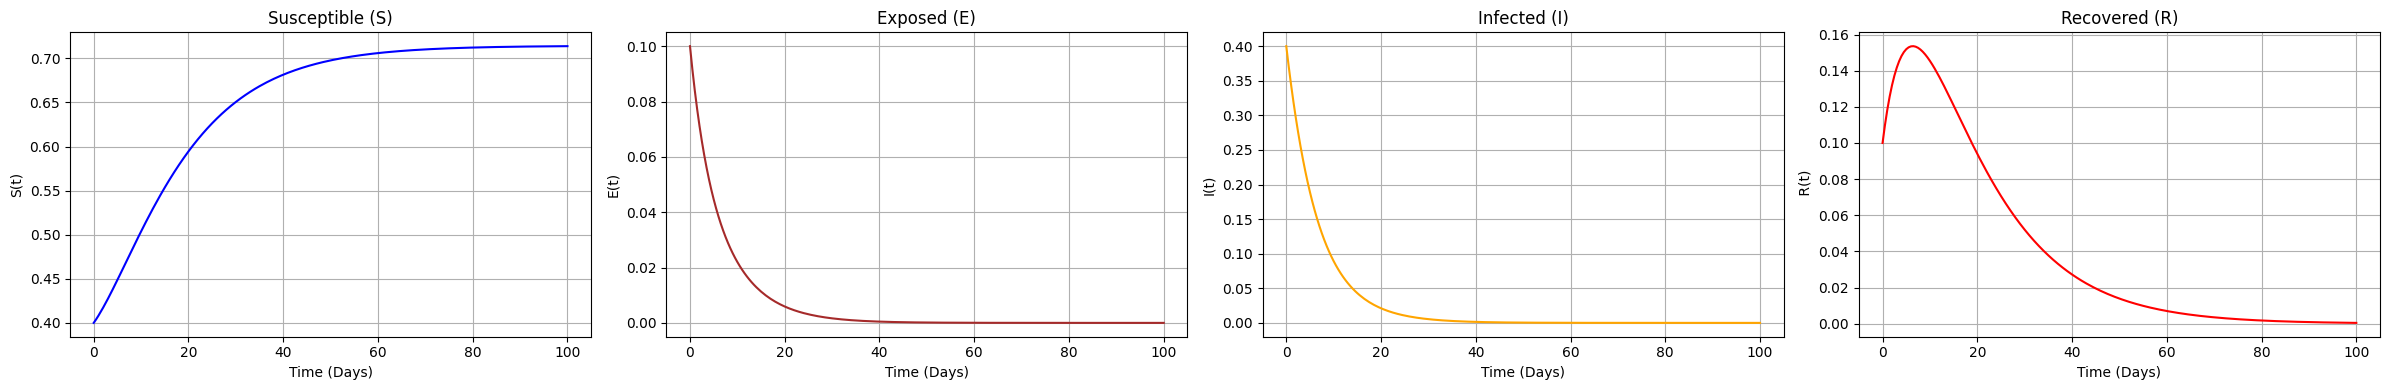

S: [0.4        0.40395775 0.40820412 0.41270158 0.41741601 0.42231635
 0.42737431 0.43256413 0.43786232 0.44324745 0.44870001 0.45420222
 0.45973789 0.46529228 0.47085203 0.476405   0.48194019 0.48744767
 0.4929185  0.49834463 0.50371883 0.50903469 0.51428647 0.51946912
 0.52457819 0.52960979 0.53456056 0.53942761 0.54420851 0.54890121
 0.55350406 0.55801574 0.56243523 0.56676183 0.57099508 0.57513476
 0.57918087 0.58313361 0.58699336 0.59076066 0.5944362  0.59802078
 0.60151535 0.60492093 0.60823865 0.61146972 0.61461542 0.61767709
 0.62065612 0.62355395 0.62637205 0.62911194 0.63177514 0.6343632
 0.63687769 0.63932018 0.64169225 0.64399548 0.64623145 0.64840174
 0.6505079  0.6525515  0.65453407 0.65645713 0.65832221 0.66013079
 0.66188433 0.66358429 0.6652321  0.66682916 0.66837684 0.66987651
 0.67132949 0.67273709 0.67410058 0.67542121 0.67670021 0.67793878
 0.67913809 0.68029928 0.68142347 0.68251175 0.68356519 0.68458482
 0.68557167 0.6865267  0.6874509  0.68834519 0.68921048 0.69

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
S0 = 0.4
E0 =  0.1
I0 = 0.4
R0 = 0.1
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

# Time parameters
t0 = 0
tf = 100  # Final time
dt = 0.5  # Time step
N = int((tf - t0) / dt)  # Number of steps

# Initialize solution arrays
t = np.linspace(t0, tf, N + 1)
S_3 = np.zeros(N + 1)
E_3 = np.zeros(N + 1)
I_3 = np.zeros(N + 1)
R_3 = np.zeros(N + 1)

# Initial values
S_3[0] = S0
E_3[0] = E0
I_3[0] = I0
R_3[0] = R0

# Define the system of equations
def f(S, E, I, R):
   dS = A -  mu * S - beta * S * I
   dE = beta * S * I - ( sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R
   return np.array([dS, dE, dI, dR])

# RK4 Method
for i in range(N):
    Si, Ei, Ii, Ri = S_3[i], E_3[i], I_3[i], R_3[i]

    k1 = dt * f(Si, Ei, Ii, Ri)
    k2 = dt * f(Si + k1[0] / 2, Ei + k1[1] / 2, Ii + k1[2] / 2, Ri + k1[3] / 2)
    k3 = dt * f(Si + k2[0] / 2, Ei + k2[1] / 2, Ii + k2[2] / 2, Ri + k2[3] / 2)
    k4 = dt * f(Si + k3[0], Ei + k3[1], Ii + k3[2], Ri + k3[3])

    S_3[i + 1] = Si + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
    E_3[i + 1] = Ei + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    I_3[i + 1] = Ii + (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
    R_3[i + 1] = Ri + (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6

# Plot the results
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.plot(t, S_3, label="S(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t, E_3, label="E(t)", color='brown')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed (E)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t, I_3, label="I(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t, R_3, label="R(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel(" R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("S:", S_3)
print("E:", E_3)
print("I:", I_3)
print("R:", R_3)

Iteration 0, Total Loss: 0.01063064020127058
Iteration 500, Total Loss: 7.345217056808906e-08
Iteration 1000, Total Loss: 1.8279489921724235e-08
Iteration 1500, Total Loss: 1.099203839061147e-08
Iteration 2000, Total Loss: 4.875962531514233e-06
Iteration 2500, Total Loss: 3.705757762872963e-07
Iteration 3000, Total Loss: 1.1959063073163634e-08
Iteration 3500, Total Loss: 1.046697889250936e-06
Iteration 4000, Total Loss: 8.443415936199017e-06
Iteration 4500, Total Loss: 1.2037257590691297e-07


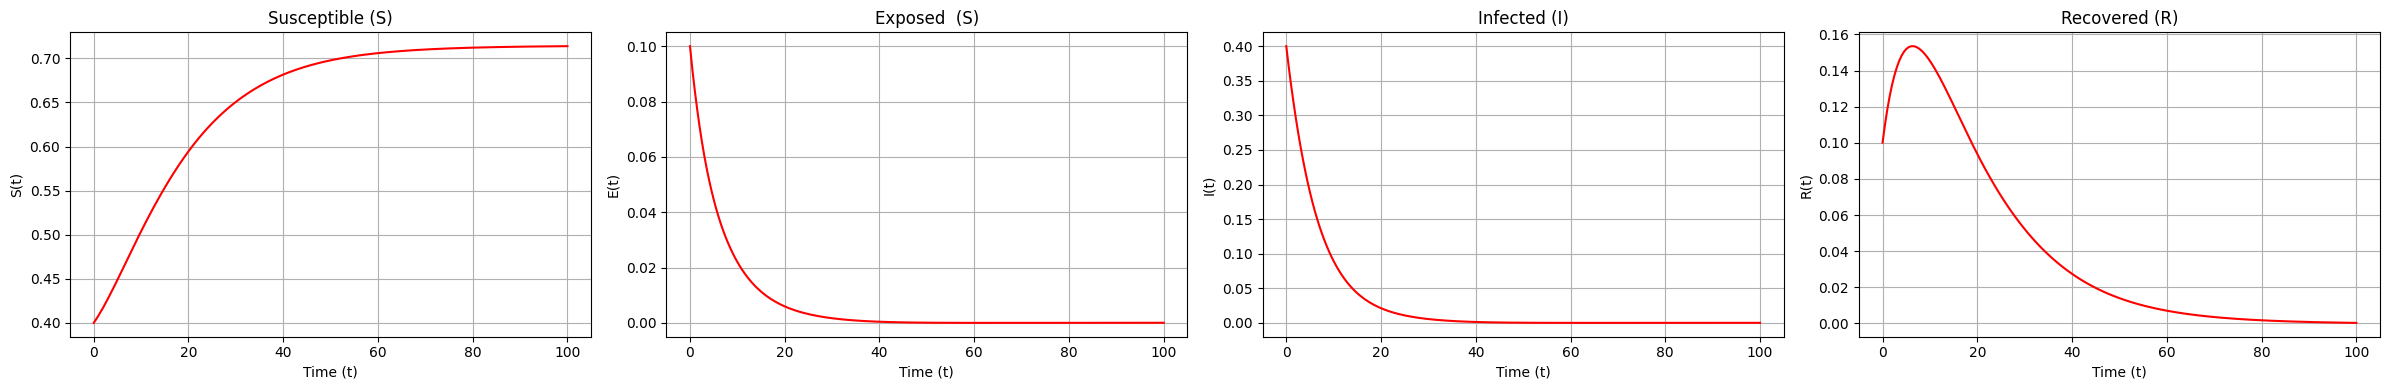

tensor([[3.9999e-01, 1.0003e-01, 4.0003e-01, 1.0009e-01],
        [4.0398e-01, 9.1564e-02, 3.7103e-01, 1.0991e-01],
        [4.0825e-01, 8.4096e-02, 3.4443e-01, 1.1848e-01],
        [4.1278e-01, 7.7319e-02, 3.1963e-01, 1.2584e-01],
        [4.1752e-01, 7.1117e-02, 2.9638e-01, 1.3212e-01],
        [4.2245e-01, 6.5504e-02, 2.7480e-01, 1.3741e-01],
        [4.2754e-01, 6.0449e-02, 2.5483e-01, 1.4181e-01],
        [4.3278e-01, 5.5878e-02, 2.3630e-01, 1.4540e-01],
        [4.3811e-01, 5.1720e-02, 2.1907e-01, 1.4825e-01],
        [4.4352e-01, 4.7925e-02, 2.0304e-01, 1.5043e-01],
        [4.4898e-01, 4.4455e-02, 1.8817e-01, 1.5199e-01],
        [4.5449e-01, 4.1277e-02, 1.7440e-01, 1.5299e-01],
        [4.6005e-01, 3.8363e-02, 1.6167e-01, 1.5347e-01],
        [4.6565e-01, 3.5686e-02, 1.4991e-01, 1.5352e-01],
        [4.7126e-01, 3.3224e-02, 1.3904e-01, 1.5317e-01],
        [4.7686e-01, 3.0953e-02, 1.2898e-01, 1.5247e-01],
        [4.8246e-01, 2.8854e-02, 1.1967e-01, 1.5148e-01],
        [4.880

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Define the fully connected neural network (FCN)
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, t):
        t = self.fcs(t)
        t = self.fch(t)
        t = self.fce(t)
        return t

torch.manual_seed(123)

# Instantiate the PINN model
pinn = FCN(1, 4, 64, 4)

# Define t_boundary for initial conditions
t_boundary_3 = torch.tensor([[0.0]], requires_grad=True)

# Define interior points for the physics-informed loss
t_physics_3 = torch.linspace(0, 100, 200).view(-1, 1).requires_grad_(True)

# Test points for evaluating the solution
t_test_3 = torch.linspace(0, 100, 200).view(-1, 1)

# Training loop
optimiser = torch.optim.Adam(pinn.parameters(), lr=1e-2)
lambda1, lambda2 = 0.01, 1.0

# For plotting S_physics, E_physics, I_physics, and R_physics at every 500 epochs
S_physics_plots_3 = []
E_physics_plots_3 = []
I_physics_plots_3 = []
R_physics_plots_3 = []
# Initial conditions
S0 = 0.4
E0 =  0.1
I0 = 0.4
R0 = 0.1
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

for i in range(5000):
    optimiser.zero_grad()

    # Enforce initial conditions:
    u_t_boundary = pinn(t_boundary_3)
    S_boundary = u_t_boundary[:, 0:1]  # First output is S(t)
    E_boundary = u_t_boundary[:, 1:2]  # Second output is E(t)
    I_boundary = u_t_boundary[:, 2:3]  # Third output is I(t)
    R_boundary = u_t_boundary[:, 3:4]  # Fourth output is R(t)
    loss_ic = torch.mean((S_boundary - S0)**2 + (E_boundary - E0)**2 +  (I_boundary - I0)**2 + (R_boundary - R0)**2)

    # Physics-informed loss for the interior points
    u_t_physics = pinn(t_physics_3)
    S_physics_3 = u_t_physics[:, 0:1]  # First output is S(t)
    E_physics_3 = u_t_physics[:, 1:2]  # Second output is E(t)
    I_physics_3 = u_t_physics[:, 2:3]  # Third output is I(t)
    R_physics_3 = u_t_physics[:, 3:4]  #Fourth output is R(t)

    # Compute dS/dt, dI/dt, dR/dt using autograd
    dS_dt = torch.autograd.grad(
        outputs=S_physics_3,
        inputs=t_physics_3,
        grad_outputs=torch.ones_like(S_physics_3),
        create_graph=True
    )[0]

    dE_dt = torch.autograd.grad(
        outputs=E_physics_3,
        inputs=t_physics_3,
        grad_outputs=torch.ones_like(E_physics_3),
        create_graph=True
    )[0]

    dI_dt = torch.autograd.grad(
        outputs=I_physics_3,
        inputs=t_physics_3,
        grad_outputs=torch.ones_like(I_physics_3),
        create_graph=True
    )[0]

    dR_dt = torch.autograd.grad(
        outputs=R_physics_3,
        inputs=t_physics_3,
        grad_outputs=torch.ones_like(R_physics_3),
        create_graph=True
    )[0]

    # Physics-informed losses using the ODEs
    loss_ode_S = torch.mean((dS_dt - A +  mu * S_physics_3 + beta * S_physics_3 * I_physics_3 )**2)
    loss_ode_E = torch.mean((dE_dt - beta * S_physics_3 * I_physics_3 + ( sigma + mu) * E_physics_3)**2)
    loss_ode_I = torch.mean((dI_dt - sigma * E_physics_3 + (alpha + mu + gamma) * I_physics_3)**2)
    loss_ode_R = torch.mean((dR_dt - gamma * I_physics_3 + mu * R_physics_3)**2)

    # Total physics-informed loss
    loss_ode = loss_ode_S + loss_ode_I + loss_ode_R + loss_ode_E

    # Total loss
    loss = lambda1 * loss_ic + lambda2 * loss_ode
    loss.backward()
    optimiser.step()

    # Print the loss every 500 epochs
    if i % 500 == 0:
        print(f"Iteration {i}, Total Loss: {loss.item()}")

    # Save S_physics,  E_physics, I_physics, and R_physics for plotting every 500 epochs
    if i % 500 == 0:
        S_physics_plots_3.append(S_physics_3.detach().numpy())
        E_physics_plots_3.append(E_physics_3.detach().numpy())
        I_physics_plots_3.append(I_physics_3.detach().numpy())
        R_physics_plots_3.append(R_physics_3.detach().numpy())

# Plot the results
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
plt.plot(t_physics_3.detach().numpy(), S_physics_3.detach().numpy(), label="S(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t_physics_3.detach().numpy(), E_physics_3.detach().numpy(), label="E(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed  (S)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t_physics_3.detach().numpy(), I_physics_3.detach().numpy(), label="I(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t_physics_3.detach().numpy(), R_physics_3.detach().numpy(), label="R(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel("R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()
print(u_t_physics)

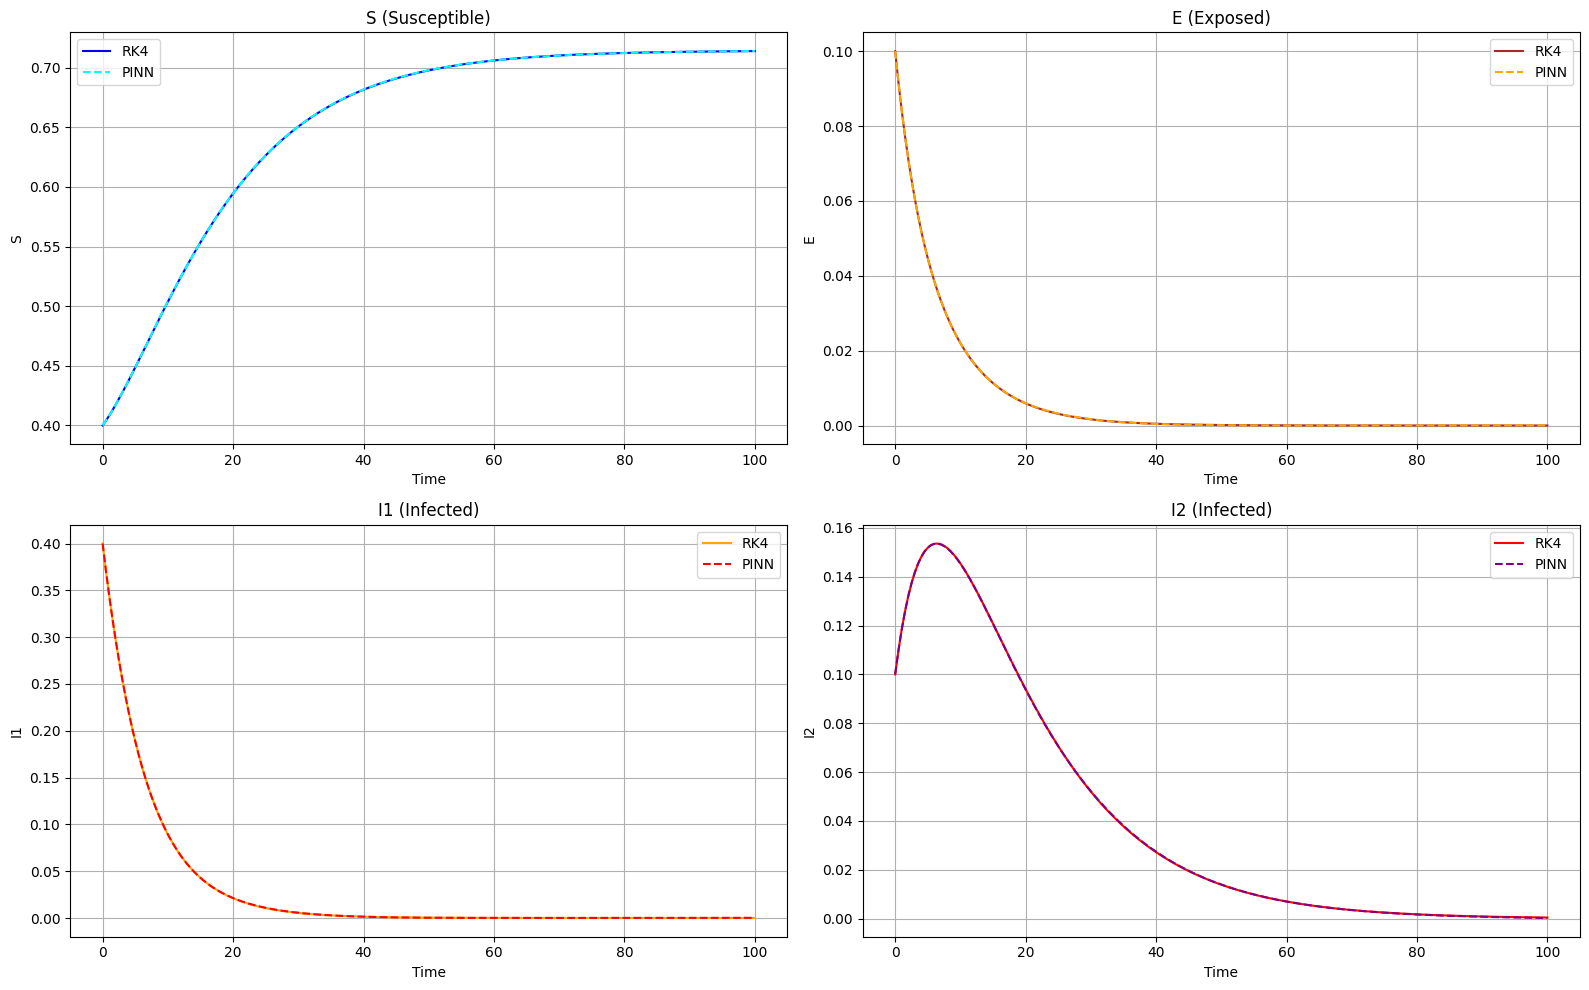

In [ ]:
# Comparison Plots
plt.figure(figsize=(16, 10))

# S(t)
plt.subplot(2, 2, 1)
plt.plot(t, S_3, label='RK4', color='blue')
plt.plot(t_physics_3.detach().numpy(), S_physics_3.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')
plt.title('S (Susceptible)')
plt.xlabel('Time(Days)')
plt.ylabel('S(t)')
plt.legend()
plt.grid()

# E(t)
plt.subplot(2, 2, 2)
plt.plot(t, E_3, label='RK4', color='brown')
plt.plot(t_physics_3.detach().numpy(), E_physics_3.detach().numpy(), label='PINN', color='orange', linestyle='dashed')
plt.title('E (Exposed)')
plt.xlabel('Time(Days)')
plt.ylabel('E(t)')
plt.legend()
plt.grid()

# I1(t)
plt.subplot(2, 2, 3)
plt.plot(t, I_3, label='RK4', color='orange')
plt.plot(t_physics_3.detach().numpy(), I_physics_3.detach().numpy(), label='PINN', color='red', linestyle='dashed')
plt.title('I (Infected)')
plt.xlabel('Time(Days)')
plt.ylabel('I(t)')
plt.legend()
plt.grid()

# I2(t)
plt.subplot(2, 2, 4)
plt.plot(t, R_3, label='RK4', color='red')
plt.plot(t_physics_3.detach().numpy(), R_physics_3.detach().numpy(), label='PINN', color='purple', linestyle='dashed')
plt.title('R (Recovered)')
plt.xlabel('Time(Days)')
plt.ylabel('R(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

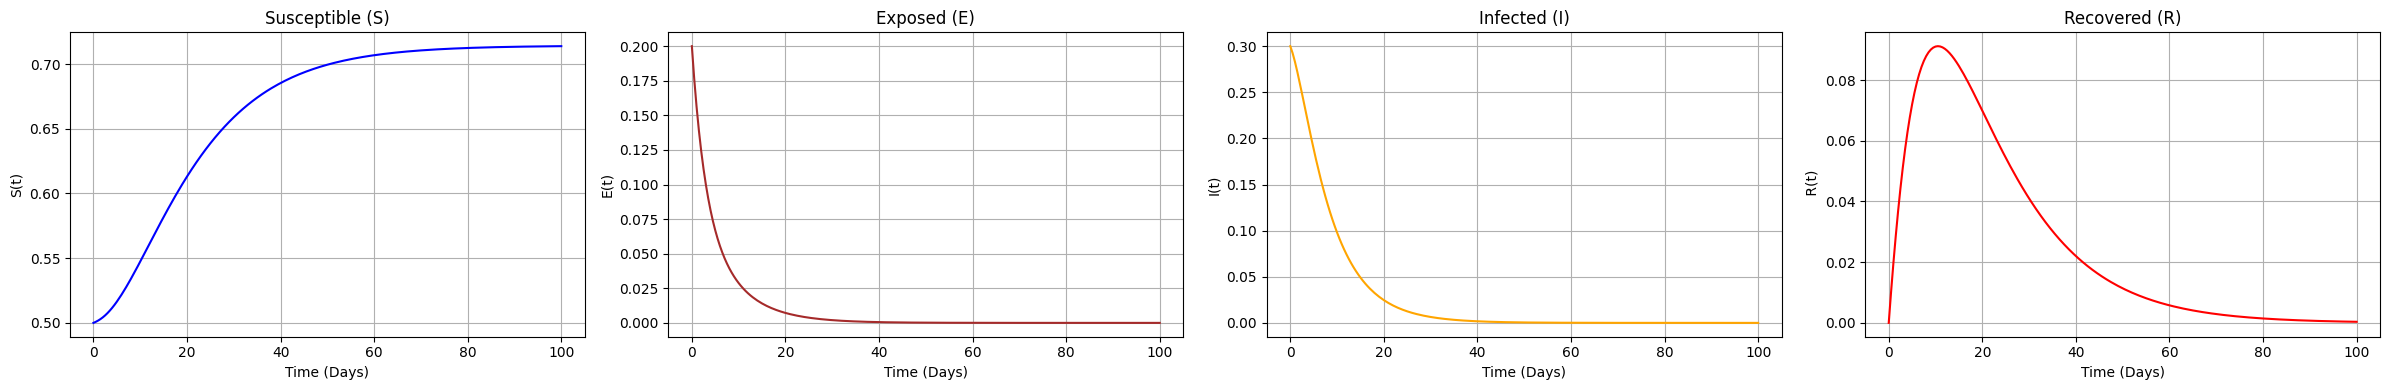

S: [0.5        0.50081261 0.50177591 0.50291738 0.504253   0.50578998
 0.5075289  0.50946542 0.51159168 0.51389727 0.5163701  0.51899704
 0.52176435 0.52465811 0.52766448 0.53076988 0.53396119 0.5372258
 0.54055174 0.54392766 0.54734293 0.55078758 0.55425235 0.55772864
 0.56120853 0.56468472 0.56815053 0.57159986 0.57502715 0.5784274
 0.58179606 0.58512906 0.58842277 0.59167397 0.5948798  0.59803775
 0.60114567 0.60420167 0.60720416 0.61015181 0.61304352 0.61587842
 0.61865582 0.62137524 0.62403635 0.62663898 0.6291831  0.6316688
 0.63409629 0.63646589 0.63877799 0.6410331  0.64323179 0.64537467
 0.64746244 0.64949586 0.6514757  0.6534028  0.65527802 0.65710226
 0.65887643 0.66060147 0.66227833 0.66390798 0.66549141 0.66702958
 0.66852349 0.66997413 0.67138248 0.67274953 0.67407625 0.67536363
 0.67661262 0.67782418 0.67899926 0.6801388  0.6812437  0.6823149
 0.68335327 0.6843597  0.68533505 0.68628018 0.68719592 0.68808309
 0.68894249 0.68977491 0.69058111 0.69136185 0.69211787 0.69284

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
S0 = 0.5
E0 =  0.2
I0 = 0.3
R0 = 0.0
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

# Time parameters
t0 = 0
tf = 100  # Final time
dt = 0.5  # Time step
N = int((tf - t0) / dt)  # Number of steps

# Initialize solution arrays
t = np.linspace(t0, tf, N + 1)
S_4 = np.zeros(N + 1)
E_4 = np.zeros(N + 1)
I_4 = np.zeros(N + 1)
R_4 = np.zeros(N + 1)

# Initial values
S_4[0] = S0
E_4[0] = E0
I_4[0] = I0
R_4[0] = R0

# Define the system of equations
def f(S, E, I, R):
   dS = A -  mu * S - beta * S * I
   dE = beta * S * I - ( sigma + mu) * E
   dI = sigma * E - (alpha + mu + gamma) * I
   dR = gamma * I - mu * R
   return np.array([dS, dE, dI, dR])

# RK4 Method
for i in range(N):
    Si, Ei, Ii, Ri = S_4[i], E_4[i], I_4[i], R_4[i]

    k1 = dt * f(Si, Ei, Ii, Ri)
    k2 = dt * f(Si + k1[0] / 2, Ei + k1[1] / 2, Ii + k1[2] / 2, Ri + k1[3] / 2)
    k3 = dt * f(Si + k2[0] / 2, Ei + k2[1] / 2, Ii + k2[2] / 2, Ri + k2[3] / 2)
    k4 = dt * f(Si + k3[0], Ei + k3[1], Ii + k3[2], Ri + k3[3])

    S_4[i + 1] = Si + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
    E_4[i + 1] = Ei + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    I_4[i + 1] = Ii + (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
    R_4[i + 1] = Ri + (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6

# Plot the results
plt.figure(figsize=(24, 4))
plt.subplot(1, 4, 1)
plt.plot(t, S_4, label="S(t)", color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t, E_4, label="E(t)", color='brown')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed (E)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t, I_4, label="I(t)", color='orange')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t, R_4, label="R(t)", color='red')
plt.xlabel("Time (Days)")
plt.ylabel(" R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("S:", S_4)
print("E:", E_4)
print("I:", I_4)
print("R:", R_4)

Iteration 0, Total Loss: 0.010927025228738785
Iteration 500, Total Loss: 1.0594521882012486e-07
Iteration 1000, Total Loss: 1.7244532912741306e-08
Iteration 1500, Total Loss: 1.356477330460848e-08
Iteration 2000, Total Loss: 1.2006796445973578e-08
Iteration 2500, Total Loss: 2.2516839237596287e-07
Iteration 3000, Total Loss: 4.835526201674156e-09
Iteration 3500, Total Loss: 5.042856354720016e-09
Iteration 4000, Total Loss: 5.1530682867451105e-06
Iteration 4500, Total Loss: 5.705317995818859e-09


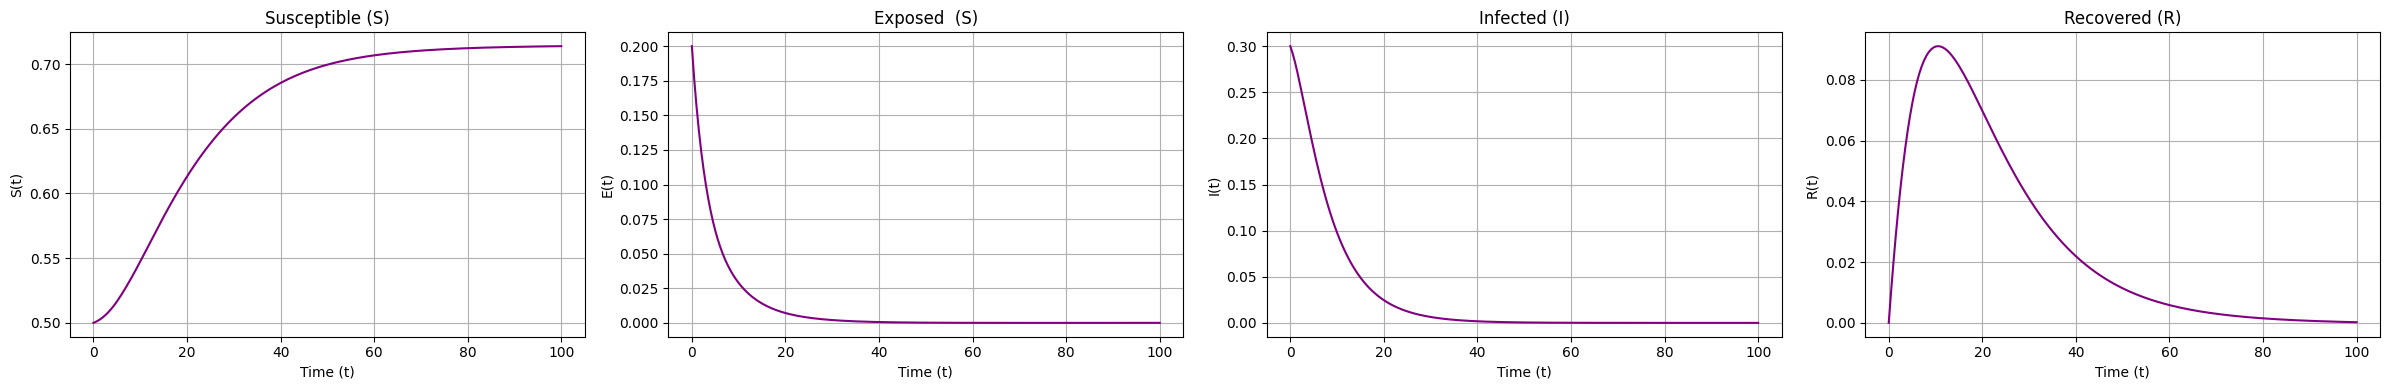

tensor([[4.9986e-01, 2.0000e-01, 3.0001e-01, 3.5234e-05],
        [5.0067e-01, 1.7614e-01, 2.9208e-01, 1.0313e-02],
        [5.0165e-01, 1.5610e-01, 2.8271e-01, 1.9865e-02],
        [5.0281e-01, 1.3876e-01, 2.7190e-01, 2.8764e-02],
        [5.0417e-01, 1.2370e-01, 2.6017e-01, 3.6998e-02],
        [5.0574e-01, 1.1070e-01, 2.4806e-01, 4.4499e-02],
        [5.0749e-01, 9.9407e-02, 2.3578e-01, 5.1289e-02],
        [5.0943e-01, 8.9522e-02, 2.2346e-01, 5.7429e-02],
        [5.1157e-01, 8.0829e-02, 2.1123e-01, 6.2962e-02],
        [5.1391e-01, 7.3174e-02, 1.9922e-01, 6.7902e-02],
        [5.1644e-01, 6.6429e-02, 1.8756e-01, 7.2260e-02],
        [5.1912e-01, 6.0477e-02, 1.7632e-01, 7.6057e-02],
        [5.2194e-01, 5.5210e-02, 1.6554e-01, 7.9326e-02],
        [5.2487e-01, 5.0531e-02, 1.5525e-01, 8.2108e-02],
        [5.2789e-01, 4.6358e-02, 1.4546e-01, 8.4444e-02],
        [5.3101e-01, 4.2618e-02, 1.3618e-01, 8.6371e-02],
        [5.3420e-01, 3.9254e-02, 1.2741e-01, 8.7925e-02],
        [5.374

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Define the fully connected neural network (FCN)
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, t):
        t = self.fcs(t)
        t = self.fch(t)
        t = self.fce(t)
        return t

torch.manual_seed(123)

# Instantiate the PINN model
pinn = FCN(1, 4, 64, 4)

# Define t_boundary for initial conditions
t_boundary_4 = torch.tensor([[0.0]], requires_grad=True)

# Define interior points for the physics-informed loss
t_physics_4 = torch.linspace(0, 100, 200).view(-1, 1).requires_grad_(True)

# Test points for evaluating the solution
t_test_4 = torch.linspace(0, 100, 10).view(-1, 1)

# Training loop
optimiser = torch.optim.Adam(pinn.parameters(), lr=1e-2)
lambda1, lambda2 = 0.01, 1.0

# For plotting S_physics, E_physics, I_physics, and R_physics at every 500 epochs
S_physics_plots_4 = []
E_physics_plots_4 = []
I_physics_plots_4 = []
R_physics_plots_4 = []
# Initial conditions
S0 = 0.5
E0 =  0.2
I0 = 0.3
R0 = 0.0
# Parameters
A = 0.05
beta = 0.09
sigma = 0.25
mu = 0.07
alpha = 0.07
gamma = 0.07

for i in range(5000):
    optimiser.zero_grad()

    # Enforce initial conditions:
    u_t_boundary = pinn(t_boundary_4)
    S_boundary = u_t_boundary[:, 0:1]
    E_boundary = u_t_boundary[:, 1:2]
    I_boundary = u_t_boundary[:, 2:3]
    R_boundary = u_t_boundary[:, 3:4]
    loss_ic = torch.mean((S_boundary - S0)**2 + (E_boundary - E0)**2 +  (I_boundary - I0)**2 + (R_boundary - R0)**2)

    # Physics-informed loss for the interior points
    u_t_physics = pinn(t_physics_4)
    S_physics_4 = u_t_physics[:, 0:1]
    E_physics_4 = u_t_physics[:, 1:2]
    I_physics_4 = u_t_physics[:, 2:3]
    R_physics_4 = u_t_physics[:, 3:4]

    # Compute dS/dt, dI/dt, dR/dt using autograd
    dS_dt = torch.autograd.grad(
        outputs=S_physics_4,
        inputs=t_physics_4,
        grad_outputs=torch.ones_like(S_physics_4),
        create_graph=True
    )[0]

    dE_dt = torch.autograd.grad(
        outputs=E_physics_4,
        inputs=t_physics_4,
        grad_outputs=torch.ones_like(E_physics_4),
        create_graph=True
    )[0]

    dI_dt = torch.autograd.grad(
        outputs=I_physics_4,
        inputs=t_physics_4,
        grad_outputs=torch.ones_like(I_physics_4),
        create_graph=True
    )[0]

    dR_dt = torch.autograd.grad(
        outputs=R_physics_4,
        inputs=t_physics_4,
        grad_outputs=torch.ones_like(R_physics_4),
        create_graph=True
    )[0]

    # Physics-informed losses using the ODEs
    loss_ode_S = torch.mean((dS_dt - A +  mu * S_physics_4 + beta * S_physics_4 * I_physics_4 )**2)
    loss_ode_E = torch.mean((dE_dt - beta * S_physics_4 * I_physics_4 + ( sigma + mu) * E_physics_4)**2)
    loss_ode_I = torch.mean((dI_dt - sigma * E_physics_4 + (alpha + mu + gamma) * I_physics_4)**2)
    loss_ode_R = torch.mean((dR_dt - gamma * I_physics_4 + mu * R_physics_4)**2)

    # Total physics-informed loss
    loss_ode = loss_ode_S + loss_ode_I + loss_ode_R + loss_ode_E

    # Total loss
    loss = lambda1 * loss_ic + lambda2 * loss_ode
    loss.backward()
    optimiser.step()

    # Print the loss every 500 epochs
    if i % 500 == 0:
        print(f"Iteration {i}, Total Loss: {loss.item()}")

    # Save S_physics, E_physics, I_physics, and R_physics for plotting every 500 epochs
    if i % 500 == 0:
        S_physics_plots_4.append(S_physics_4.detach().numpy())
        E_physics_plots_4.append(E_physics_4.detach().numpy())
        I_physics_plots_4.append(I_physics_4.detach().numpy())
        R_physics_plots_4.append(R_physics_4.detach().numpy())

# Plot the results
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
plt.plot(t_physics_4.detach().numpy(), S_physics_4.detach().numpy(), label="S(t)", color='purple')
plt.xlabel("Time (Days)")
plt.ylabel("S(t)")
plt.title("Susceptible (S)")
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t_physics_4.detach().numpy(), E_physics_4.detach().numpy(), label="E(t)", color='purple')
plt.xlabel("Time (Days)")
plt.ylabel("E(t)")
plt.title("Exposed  (S)")
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t_physics_4.detach().numpy(), I_physics_4.detach().numpy(), label="I(t)", color='purple')
plt.xlabel("Time (Days)")
plt.ylabel("I(t)")
plt.title("Infected (I)")
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t_physics_4.detach().numpy(), R_physics_4.detach().numpy(), label="R(t)", color='purple')
plt.xlabel("Time (Days)")
plt.ylabel("R(t)")
plt.title("Recovered (R)")
plt.grid(True)

plt.tight_layout()
plt.show()
print(u_t_physics)

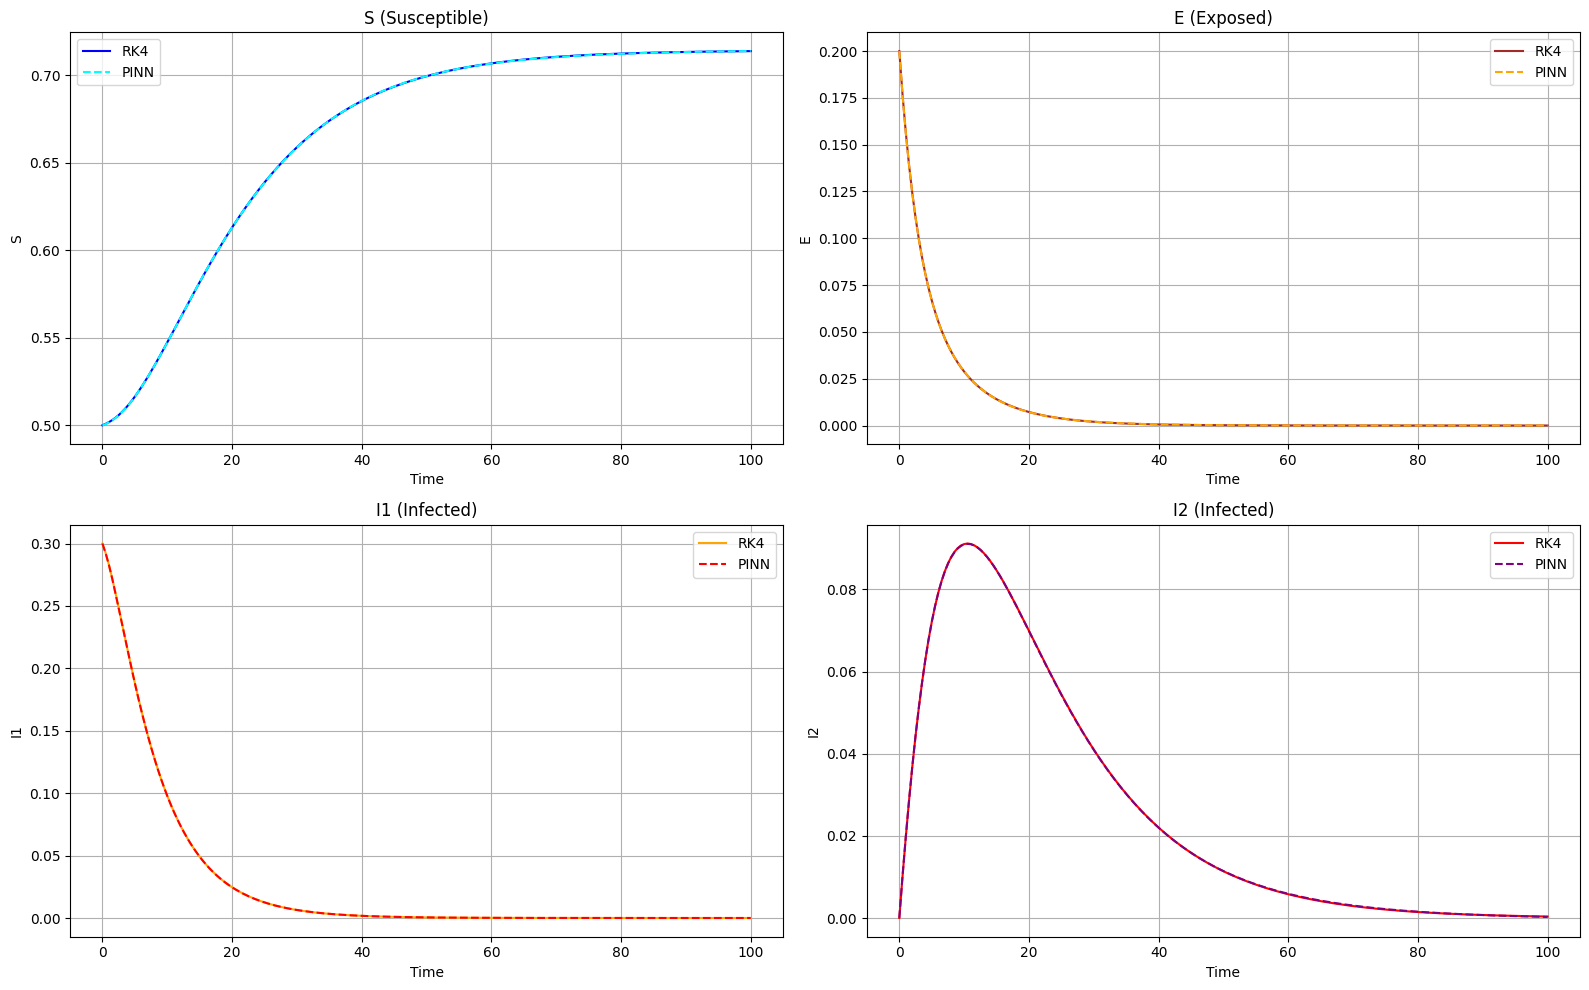

In [ ]:
# Comparison Plots
plt.figure(figsize=(16, 10))

# S(t)
plt.subplot(2, 2, 1)
plt.plot(t, S_4, label='RK4', color='blue')
plt.plot(t_physics_4.detach().numpy(), S_physics_4.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')
plt.title('S (Susceptible)')
plt.xlabel('Time(days)')
plt.ylabel('S(t)')
plt.legend()
plt.grid()

# E(t)
plt.subplot(2, 2, 2)
plt.plot(t, E_4, label='RK4', color='brown')
plt.plot(t_physics_4.detach().numpy(), E_physics_4.detach().numpy(), label='PINN', color='orange', linestyle='dashed')
plt.title('E (Exposed)')
plt.xlabel('Time(Days)')
plt.ylabel('E(t)')
plt.legend()
plt.grid()

# I1(t)
plt.subplot(2, 2, 3)
plt.plot(t, I_4, label='RK4', color='orange')
plt.plot(t_physics_4.detach().numpy(), I_physics_4.detach().numpy(), label='PINN', color='red', linestyle='dashed')
plt.title('I (Infected)')
plt.xlabel('Time(Days)')
plt.ylabel('I(t)')
plt.legend()
plt.grid()

# I2(t)
plt.subplot(2, 2, 4)
plt.plot(t, R_4, label='RK4', color='red')
plt.plot(t_physics_4.detach().numpy(), R_physics_4.detach().numpy(), label='PINN', color='purple', linestyle='dashed')
plt.title('R (Recovered)')
plt.xlabel('Time(Days)')
plt.ylabel('R(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

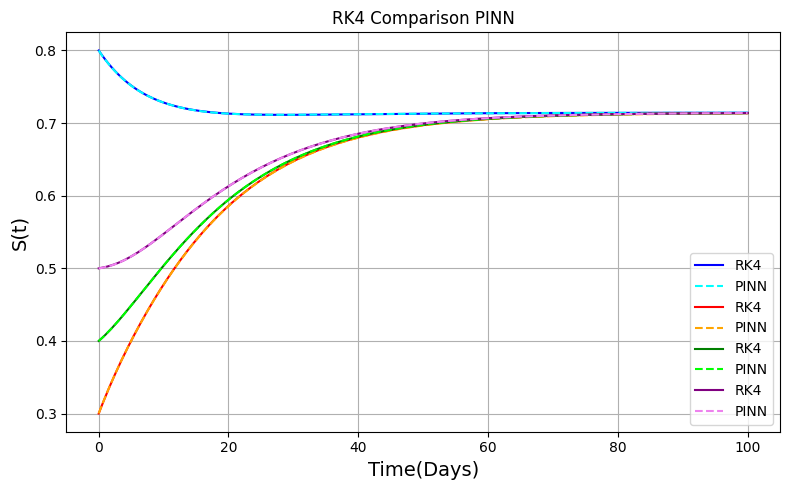

In [ ]:
# Combined Comparison Plot
plt.figure(figsize=(8, 5))

# Plot all cases in one graph
plt.plot(t, S_1, label='RK4', color='blue')
plt.plot(t_physics_1.detach().numpy(), S_physics_1.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')

plt.plot(t, S_2, label='RK4', color='red')
plt.plot(t_physics_2.detach().numpy(), S_physics_2.detach().numpy(), label='PINN', color='orange', linestyle='dashed')

plt.plot(t, S_3, label='RK4', color='green')
plt.plot(t_physics_3.detach().numpy(), S_physics_3.detach().numpy(), label='PINN', color='lime', linestyle='dashed')

plt.plot(t, S_4, label='RK4', color='purple')
plt.plot(t_physics_4.detach().numpy(), S_physics_4.detach().numpy(), label='PINN', color='violet', linestyle='dashed')

# Add titles, labels, and legend
plt.title('RK4 Comparison PINN')
plt.xlabel('Time(Days)', fontsize = 14)
plt.ylabel('S(t)', fontsize =14)
plt.legend(loc='best')
plt.grid()

# Show the combined plot
plt.tight_layout()
plt.show()

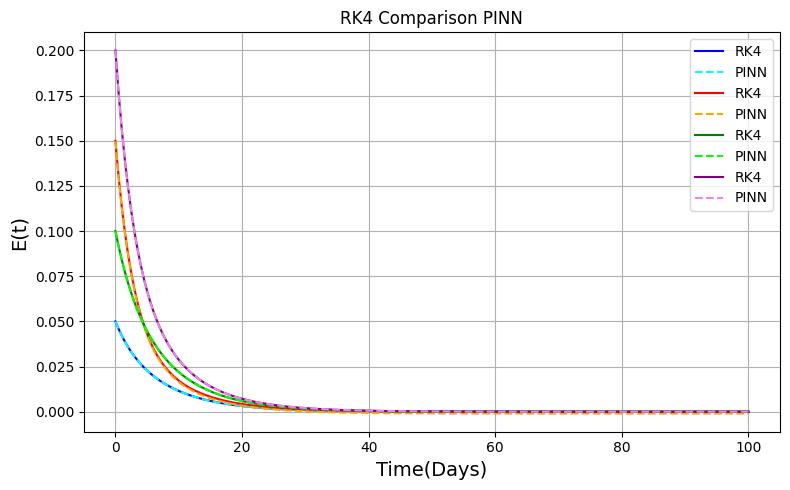

In [ ]:
# Combined Comparison Plot
plt.figure(figsize=(8, 5))

# Plot all cases in one graph
plt.plot(t, E_1, label='RK4', color='blue')
plt.plot(t_physics_1.detach().numpy(), E_physics_1.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')

plt.plot(t, E_2, label='RK4', color='red')
plt.plot(t_physics_2.detach().numpy(), E_physics_2.detach().numpy(), label='PINN', color='orange', linestyle='dashed')

plt.plot(t, E_3, label='RK4', color='green')
plt.plot(t_physics_3.detach().numpy(), E_physics_3.detach().numpy(), label='PINN', color='lime', linestyle='dashed')

plt.plot(t, E_4, label='RK4', color='purple')
plt.plot(t_physics_4.detach().numpy(), E_physics_4.detach().numpy(), label='PINN', color='violet', linestyle='dashed')

# Add titles, labels, and legend
plt.title('RK4 Comparison PINN')
plt.xlabel('Time(Days)', fontsize = 14)
plt.ylabel('E(t)', fontsize = 14)
plt.legend(loc='best')
plt.grid()

# Show the combined plot
plt.tight_layout()
plt.show()

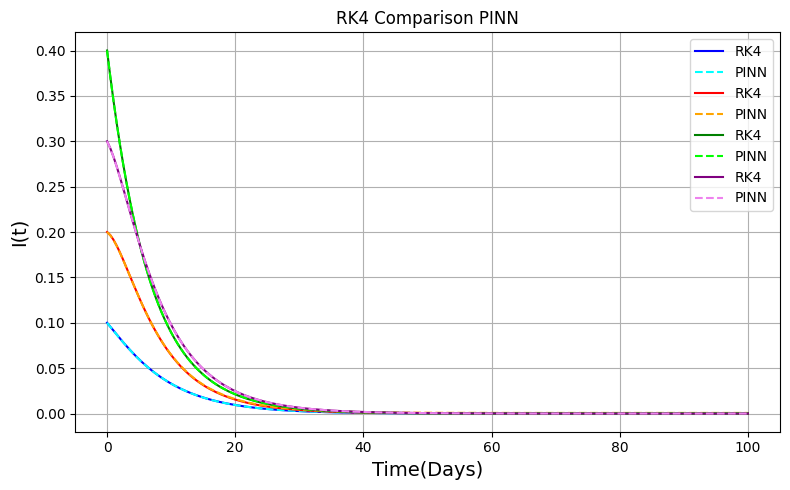

In [ ]:
# Combined Comparison Plot
plt.figure(figsize=(8, 5))

# Plot all cases in one graph
plt.plot(t, I_1, label='RK4', color='blue')
plt.plot(t_physics_1.detach().numpy(), I_physics_1.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')

plt.plot(t, I_2, label='RK4', color='red')
plt.plot(t_physics_2.detach().numpy(), I_physics_2.detach().numpy(), label='PINN', color='orange', linestyle='dashed')

plt.plot(t, I_3, label='RK4', color='green')
plt.plot(t_physics_3.detach().numpy(), I_physics_3.detach().numpy(), label='PINN', color='lime', linestyle='dashed')

plt.plot(t, I_4, label='RK4', color='purple')
plt.plot(t_physics_4.detach().numpy(), I_physics_4.detach().numpy(), label='PINN', color='violet', linestyle='dashed')

# Add titles, labels, and legend
plt.title('RK4 Comparison PINN')
plt.xlabel('Time(Days)', fontsize =14)
plt.ylabel('I(t)', fontsize =14)
plt.legend(loc='best')
plt.grid()

# Show the combined plot
plt.tight_layout()
plt.show()

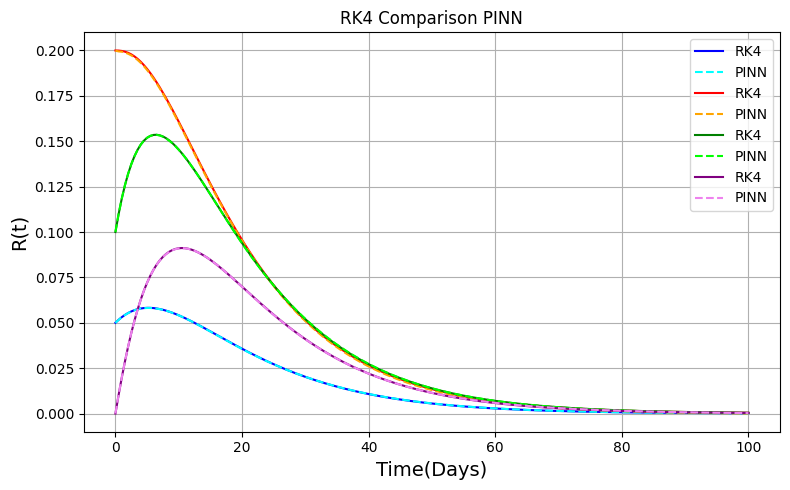

In [ ]:
# Combined Comparison Plot
plt.figure(figsize=(8, 5))

# Plot all cases in one graph
plt.plot(t, R_1, label='RK4', color='blue')
plt.plot(t_physics_1.detach().numpy(), R_physics_1.detach().numpy(), label='PINN', color='cyan', linestyle='dashed')

plt.plot(t, R_2, label='RK4', color='red')
plt.plot(t_physics_2.detach().numpy(), R_physics_2.detach().numpy(), label='PINN', color='orange', linestyle='dashed')

plt.plot(t, R_3, label='RK4', color='green')
plt.plot(t_physics_3.detach().numpy(), R_physics_3.detach().numpy(), label='PINN', color='lime', linestyle='dashed')

plt.plot(t, R_4, label='RK4', color='purple')
plt.plot(t_physics_4.detach().numpy(), R_physics_4.detach().numpy(), label='PINN', color='violet', linestyle='dashed')

# Add titles, labels, and legend
plt.title('RK4 Comparison PINN')
plt.xlabel('Time(Days)', fontsize =14)
plt.ylabel('R(t)', fontsize =14)
plt.legend(loc='best')
plt.grid()

# Show the combined plot
plt.tight_layout()
plt.show()